In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [30]:
file_path = 'Report Item Details - 01-01-2023 - 09-05-2023 - Outlet_1 - 645b0e0d.csv'
data = pd.read_csv(file_path)
features = ['Gross Sales', 'Quantity', 'Discounts', 'Net Sales']
target = 'Net Sales'


In [31]:
features = ['Gross Sales', 'Quantity', 'Discounts', 'Net Sales']
target = 'Net Sales'

In [32]:
# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[target], test_size=0.2, random_state=42
)


In [33]:
# Buat model regresi linear
model = LinearRegression()

In [34]:
# Latih model dengan data pelatihan
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Prediksi jumlah penjualan pada data pengujian
y_pred = model.predict(X_test)

In [36]:
# Evaluasi performa model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [37]:
# Print hasil evaluasi
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MAE: 9.994085154575189e-13
RMSE: 1.855027495044627e-12
R-squared: 1.0


In [38]:
# Tentukan food terlaris berdasarkan koefisien regresi
coef = model.coef_
feature_importance = dict(zip(features, coef))

In [39]:
# Print koefisien regresi
print('Koefisien Regresi:')
for feature, coef in feature_importance.items():
    print(f'{feature}: {coef}')

Koefisien Regresi:
Gross Sales: 1.0913407526656542e-07
Quantity: 1.0769163338864018e-14
Discounts: -1.0913407583464804e-07
Net Sales: 0.9999998908659247


In [40]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [41]:
knn_model.fit(X_train, y_train)
# Prediksi jumlah penjualan pada data pengujian dengan KNN
y_pred_knn = knn_model.predict(X_test)

In [42]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)

In [43]:
print('K-Nearest Neighbors:')
print(f'MAE: {mae_knn}')
print(f'RMSE: {rmse_knn}')
print(f'R-squared: {r2_knn}')

K-Nearest Neighbors:
MAE: 91.42857142857143
RMSE: 966.4714588363909
R-squared: 0.9950648066651296


In [44]:
# Temukan produk dengan rating tertinggi (asumsi kolom 'rating' ada)
food_terlaris = data.sort_values(by='Date', ascending=False).head(10)

In [45]:
# Print 10 produk terlaris berdasarkan rating
print('\n10 Produk Terlaris :')
print(food_terlaris[['Category', 'Date']])


10 Produk Terlaris :
              Category        Date
933            Minuman  31-03-2023
928      Bakso Rebusan  31-03-2023
923  Chicken Rice Bowl  31-03-2023
925            Minuman  31-03-2023
926  Topping rice bowl  31-03-2023
927        Bakso Paket  31-03-2023
924            Minuman  31-03-2023
929            Minuman  31-03-2023
930        Bakso Paket  31-03-2023
931            Minuman  31-03-2023


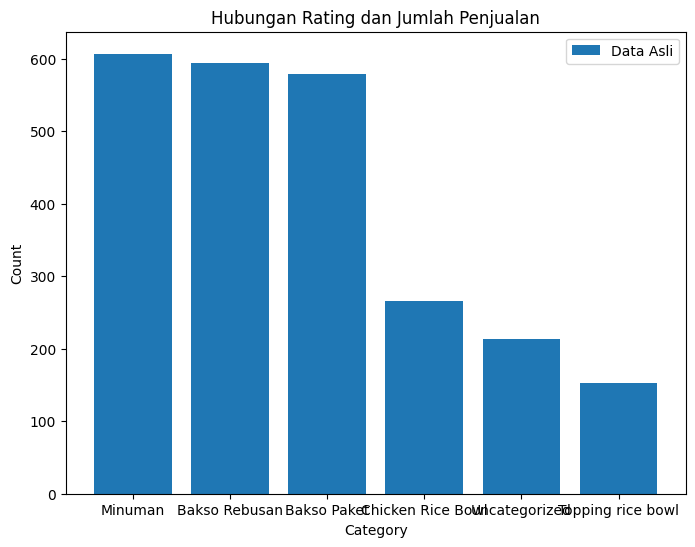

In [46]:
plt.figure(figsize=(8, 6))
category_counts = data['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values, label='Data Asli')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Hubungan Rating dan Jumlah Penjualan')
plt.legend()
plt.show()

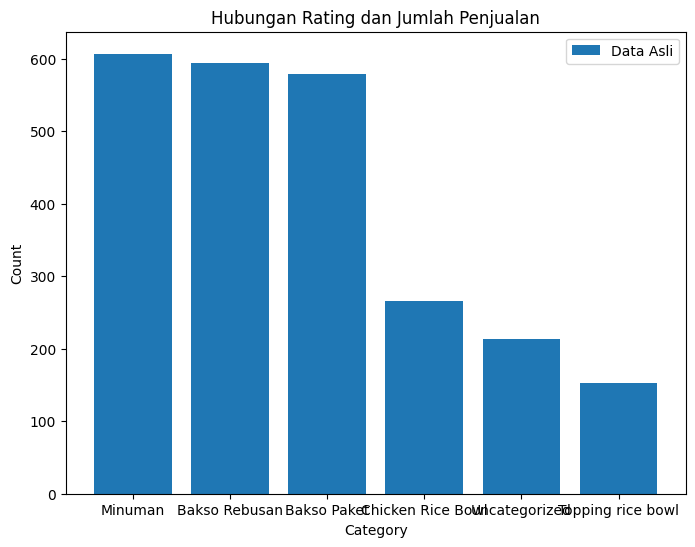

In [47]:
plt.figure(figsize=(8, 6))
category_counts = data['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values, label='Data Asli')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Hubungan Rating dan Jumlah Penjualan')
plt.legend()
plt.show()
